In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%config InlineBackend.figure_format = 'svg'
# %matplotlib inline

pd.options.display.max_rows = 20

FILE = r'pickles/with_weekdays.pickle'

with open(FILE, 'rb') as read_file:
    df = pickle.load(read_file)

df.head()

# df = pd.read_csv(FILE)

# df.rename(columns={'EXITS                                                               ': 'EXITS'}, inplace=True)
# df.drop('Unnamed: 0', axis=1, inplace = True)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY_NUM,WEEKDAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,00:00:00,REGULAR,6625470,2245312,2018-05-19 00:00:00,5,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,04:00:00,REGULAR,6625494,2245314,2018-05-19 04:00:00,5,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,08:00:00,REGULAR,6625514,2245338,2018-05-19 08:00:00,5,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,12:00:00,REGULAR,6625595,2245415,2018-05-19 12:00:00,5,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,16:00:00,REGULAR,6625791,2245481,2018-05-19 16:00:00,5,Saturday


In [2]:
turnstile = ["C/A", "UNIT", "SCP", "STATION"]

df.drop_duplicates(subset=turnstile+["DATETIME"], inplace=True)

In [3]:
df = df.sort_values(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'WEEKDAY', 'TIME']) # is this redundant?
df[['PREV_TIME','PREV_ENTRIES','PREV_EXITS']] = (df.groupby(turnstile)['TIME','ENTRIES','EXITS'].transform(lambda x: x.shift(1)))

df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY_NUM,WEEKDAY,PREV_TIME,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829,2018-04-28 00:00:00,5,Saturday,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00,5,Saturday,00:00:00,6598847.0,2235829.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00,5,Saturday,04:00:00,6598864.0,2235830.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955,2018-04-28 12:00:00,5,Saturday,08:00:00,6598880.0,2235863.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015,2018-04-28 16:00:00,5,Saturday,12:00:00,6598961.0,2235955.0


In [4]:
"""
Attempt to fill in outliers with mean
"""

# mask = ((df["ENTRIES"] - df["PREV_ENTRIES"] < 10000))
# non_outliers = df[]

# def get_entry_counts(row, max_counter):
#     counter = row["ENTRIES"] - row["PREV_ENTRIES"]
#     if counter < 0:
#         counter = -counter
#     if counter > max_counter: 
#         # get date, station, turnstile
#         turn = row[turnstile]
#         date = row["DATE"]
#         # get mean thereof
#         mask = ((df[turnstile] == turn)&(df["DATE"] == date))
        
#         non_outliers = [log for log in df[mask] if log["ENTRIES"] - log["PREV_ENTRIES"] < max_counter]
#         for i in non_outliers:
            
#             # need to make sure mean doesn't contain outliers itself
        
#         # return mena
#         return 0 # want to return mean instead of 0
#     return counter

'\nAttempt to fill in outliers with mean\n'

In [5]:
def get_entry_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter: 
        return 0 # want to return mean instead of 0
    return counter

def get_exit_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        return 0
    return counter

df["ENTRY_COUNTS"] = df.apply(get_entry_counts, axis=1, max_counter=4000) 
df["EXIT_COUNTS"] = df.apply(get_exit_counts, axis=1, max_counter=4000)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY_NUM,WEEKDAY,PREV_TIME,PREV_ENTRIES,PREV_EXITS,ENTRY_COUNTS,EXIT_COUNTS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829,2018-04-28 00:00:00,5,Saturday,NaN,NaN,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00,5,Saturday,00:00:00,6598847.0,2235829.0,17.0,1.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00,5,Saturday,04:00:00,6598864.0,2235830.0,16.0,33.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955,2018-04-28 12:00:00,5,Saturday,08:00:00,6598880.0,2235863.0,81.0,92.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015,2018-04-28 16:00:00,5,Saturday,12:00:00,6598961.0,2235955.0,214.0,60.0


In [6]:
# define total activity (entry + exit) field
df['TOTAL_ACTIVITY'] = df['ENTRY_COUNTS'] + df['EXIT_COUNTS']
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY_NUM,WEEKDAY,PREV_TIME,PREV_ENTRIES,PREV_EXITS,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829,2018-04-28 00:00:00,5,Saturday,NaN,NaN,NaN,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00,5,Saturday,00:00:00,6598847.0,2235829.0,17.0,1.0,18.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00,5,Saturday,04:00:00,6598864.0,2235830.0,16.0,33.0,49.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955,2018-04-28 12:00:00,5,Saturday,08:00:00,6598880.0,2235863.0,81.0,92.0,173.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015,2018-04-28 16:00:00,5,Saturday,12:00:00,6598961.0,2235955.0,214.0,60.0,274.0


In [7]:
# drop extraneous columns to save space

df.drop(['TIME', 'WEEKDAY_NUM', 'LINENAME', 'PREV_TIME'], axis=1, inplace=True)
df.head()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY,PREV_ENTRIES,PREV_EXITS,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
0,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598847,2235829,2018-04-28 00:00:00,Saturday,NaN,NaN,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598864,2235830,2018-04-28 04:00:00,Saturday,6598847.0,2235829.0,17.0,1.0,18.0
2,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598880,2235863,2018-04-28 08:00:00,Saturday,6598864.0,2235830.0,16.0,33.0,49.0
3,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598961,2235955,2018-04-28 12:00:00,Saturday,6598880.0,2235863.0,81.0,92.0,173.0
4,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6599175,2236015,2018-04-28 16:00:00,Saturday,6598961.0,2235955.0,214.0,60.0,274.0


In [8]:
df.drop(['PREV_ENTRIES', 'PREV_EXITS'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788761 entries, 0 to 198173
Data columns (total 14 columns):
C/A               788761 non-null object
UNIT              788761 non-null object
SCP               788761 non-null object
STATION           788761 non-null object
DIVISION          788761 non-null object
DATE              788761 non-null object
DESC              788761 non-null object
ENTRIES           788761 non-null int64
EXITS             788761 non-null int64
DATETIME          788761 non-null datetime64[ns]
WEEKDAY           788761 non-null object
ENTRY_COUNTS      784044 non-null float64
EXIT_COUNTS       784044 non-null float64
TOTAL_ACTIVITY    784044 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 90.3+ MB


In [9]:
len(df)

788761

In [10]:
len(df[df['ENTRY_COUNTS'] == 0])

117755

In [11]:
# most trafficked station over the time period
dfstat = df.groupby('STATION').sum()

# identify the top 10 trafficked station by entries
top10entries = dfstat.sort_values('ENTRY_COUNTS', ascending=False)[['ENTRY_COUNTS']].head(10).reset_index()
top10entries

,STATION,ENTRY_COUNTS
0,34 ST-PENN STA,4038742.0
1,GRD CNTRL-42 ST,3558683.0
2,34 ST-HERALD SQ,3133473.0
3,23 ST,2928513.0
4,14 ST-UNION SQ,2706239.0
5,42 ST-PORT AUTH,2591378.0
6,TIMES SQ-42 ST,2587514.0
7,FULTON ST,2372369.0
8,86 ST,2154551.0
9,125 ST,2069794.0


In [12]:
top10exits = dfstat.sort_values('EXIT_COUNTS', ascending=False)[['EXIT_COUNTS']].head(10).reset_index()
top10exits

,STATION,EXIT_COUNTS
0,34 ST-PENN STA,3468128.0
1,GRD CNTRL-42 ST,3276752.0
2,34 ST-HERALD SQ,2726785.0
3,TIMES SQ-42 ST,2371727.0
4,14 ST-UNION SQ,2335400.0
5,23 ST,2112241.0
6,FULTON ST,1936641.0
7,42 ST-PORT AUTH,1876402.0
8,86 ST,1801213.0
9,125 ST,1604726.0


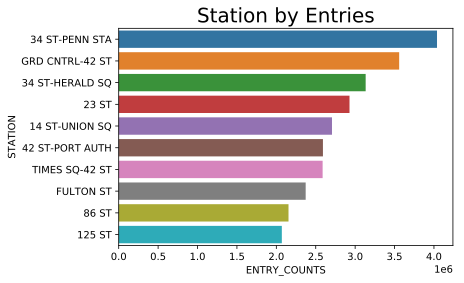

In [13]:
import seaborn as sns

sns.barplot(y = 'STATION', x = 'ENTRY_COUNTS', data=top10entries, orient='h');
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x');
plt.title('Station by Entries', fontdict={'fontsize': 20});

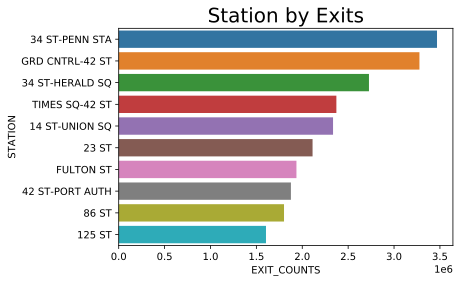

In [14]:
sns.barplot(y = 'STATION', x = 'EXIT_COUNTS', data=top10exits, orient='h');
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x');
plt.title('Station by Exits', fontdict={'fontsize': 20});

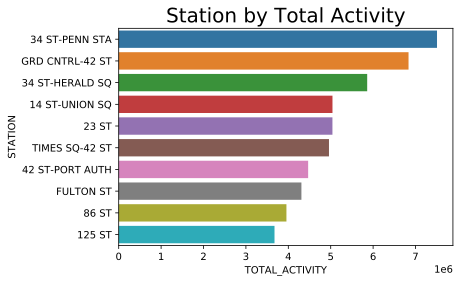

In [15]:
top10active = dfstat.sort_values('TOTAL_ACTIVITY', ascending=False)[['TOTAL_ACTIVITY']].head(10).reset_index()

sns.barplot(y = 'STATION', x = 'TOTAL_ACTIVITY', data=top10active, orient='h');
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x');
plt.title('Station by Total Activity', fontdict={'fontsize': 20});

## Busiest days at Penn station?

In [18]:
df.groupby(['STATION', 'DATE'])[['ENTRY_COUNTS', 'EXIT_COUNTS']].sum().sort_values('ENTRY_COUNTS', ascending=False)

ENTRY_COUNTS  EXIT_COUNTS
STATION         DATE                                 
34 ST-PENN STA  05/17/2018      182489.0     147084.0
                05/16/2018      178359.0     152310.0
                05/15/2018      177167.0     150457.0
                05/10/2018      176257.0     149608.0
                05/24/2018      175938.0     148536.0
                05/23/2018      174051.0     148511.0
                05/22/2018      173777.0     148170.0
                05/03/2018      173752.0     147724.0
                05/09/2018      172770.0     147729.0
GRD CNTRL-42 ST 05/16/2018      172744.0     153812.0
...                                  ...          ...
CLARK ST        05/06/2018           0.0          1.0
NEWARK HM HE    04/28/2018           0.0       8670.0
231 ST          05/13/2018           0.0          0.0
AVENUE X        05/06/2018           0.0          0.0
NEW LOTS AV     05/20/2018           0.0          0.0
JUNIUS ST       04/29/2018           0.0          2.0
                05/13/2018           0.0          0.0
NEW LOTS AV     05/13/2018           0.0          1.0
JUNIUS ST       05/20/2018           0.0          5.0
AVENUE P        04/28/2018           0.0          0.0

[10475 rows x 2 columns]

In [17]:
# pickle df

with open('pickles/may_2018_with_counts.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)